In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 70

### 1. Lectura

In [2]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)
df.shape

In [3]:
# seleccion columnas por apellido
var_all = ['country', 'region']
var_MZ = ['femlab', 'literacy', 'school']

select_df = df.loc[:, var_all + var_MZ]

In [4]:
select_df.head()

,country,region,femlab,literacy,school
1,Algeria,Africa,0.4522,72.599998,6.716667
2,Benin,Africa,0.8482,41.700001,3.100000
3,Botswana,Africa,0.8870,84.099998,8.600000
4,Burkina Faso,Africa,0.8584,23.600000,1.300000
5,Burundi,Africa,1.0344,66.599998,2.483333


### 2. Refactorización gráficos

### 2.1 Histogram

Matplotlib function

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    # 1 si el valor es mayor a la media, 0 en otro caso
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    # separacion del conjunto de datos a partir de resultado en variable binarize
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    # 1 plot
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    # 2 Plot
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

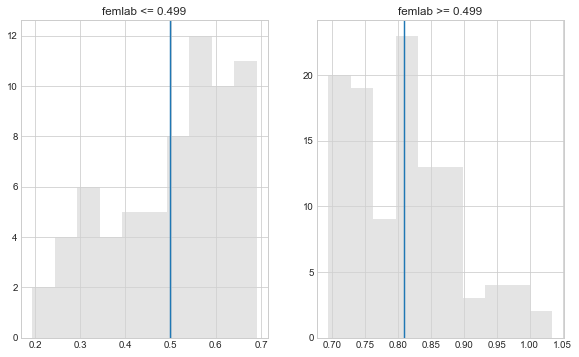

In [6]:
binarize_histogram(df, 'femlab')

Seaborn function.

In [7]:
def binarize_histogram_seaborn(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    # creamos grillas
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2)
    grid.map(sns.distplot, variable)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

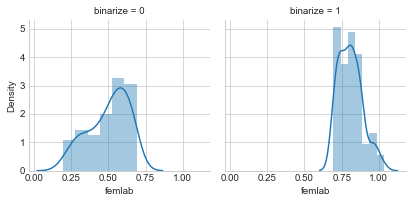

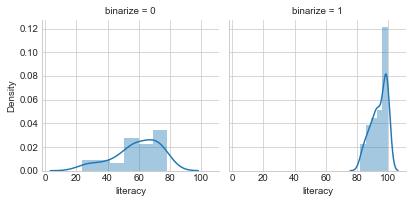

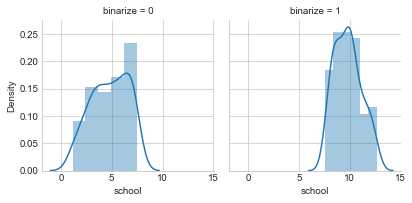

In [8]:
for col in var_MZ:
    binarize_histogram_seaborn(df, col)

### 2.2 Boxplot

Matplotlib function

In [9]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

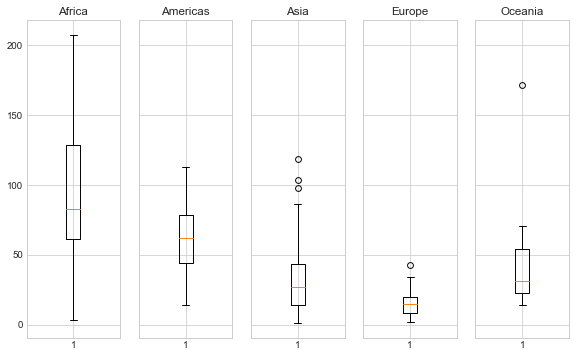

In [10]:
grouped_boxplot(df, 'adfert', 'region')

Seaborn function

<AxesSubplot:xlabel='region', ylabel='adfert'>

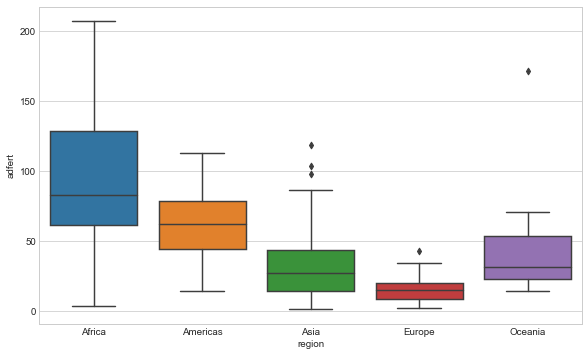

In [11]:
sns.boxplot(data=df, x='region', y='adfert') # agregando showfliers=Flase, elimina outliers

### 2.3 Scatterplots

Matplotlib function

In [12]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

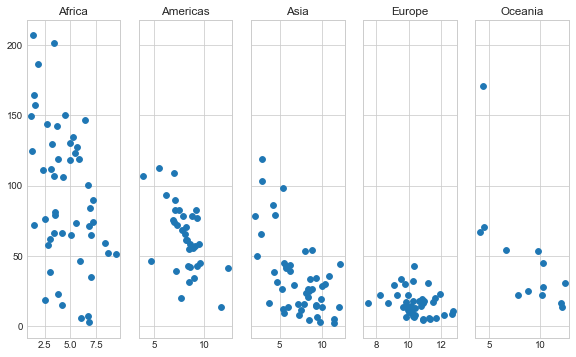

In [13]:
grouped_scatterplot(df, 'school', 'adfert', 'region')

Seaborn function

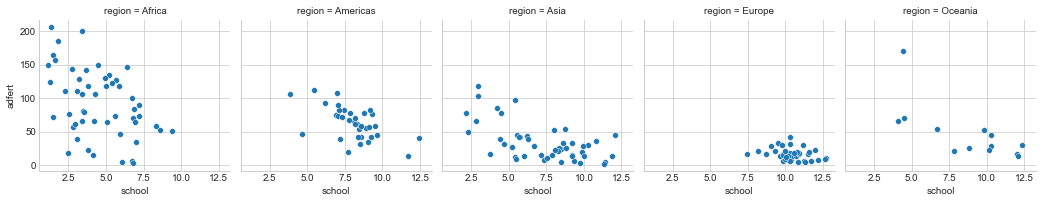

In [14]:
grid = sns.FacetGrid(df, col='region', col_wrap=5)
grid.map(sns.scatterplot, 'school', 'adfert')

### 3. Heatmap

<AxesSubplot:>

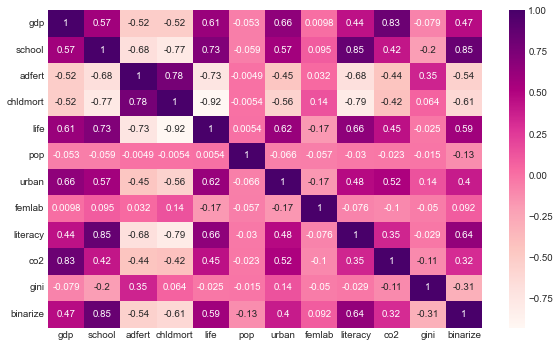

In [15]:
sns.heatmap(df.corr(), cmap='RdPu', annot=True)

<AxesSubplot:>

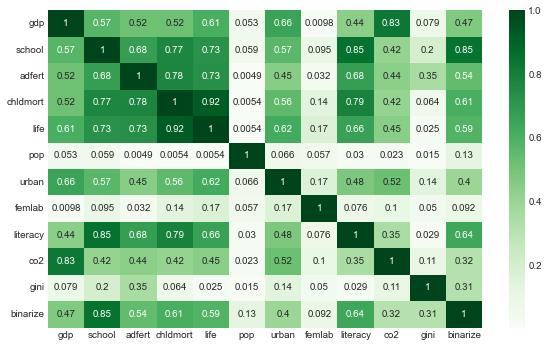

In [16]:
sns.heatmap(np.abs(df.corr()), cmap='Greens', annot=True)

### 4. Matriz correlaciones

In [17]:
def correlacion_heatmap(df, var):
    valores_unicos = df[var].unique()
    for v in valores_unicos:
        plt.figure(figsize=(8,8))
        sns.heatmap(df.loc[df[var] == v].corr(), cmap='RdBu_r', annot=True)
        plt.title(f'Correlaciones para {v}')
        plt.show()

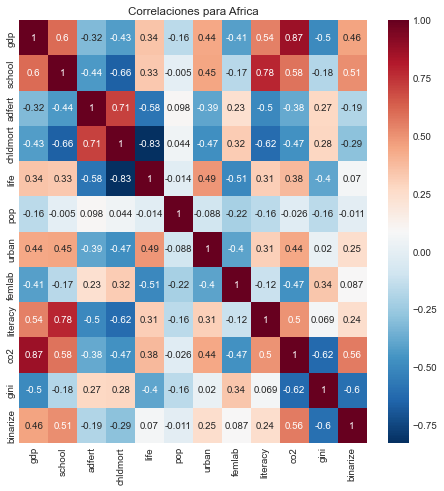

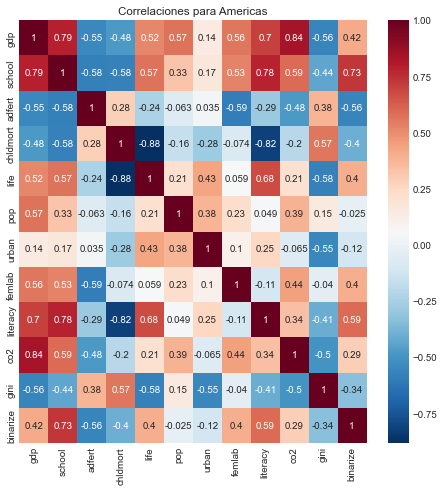

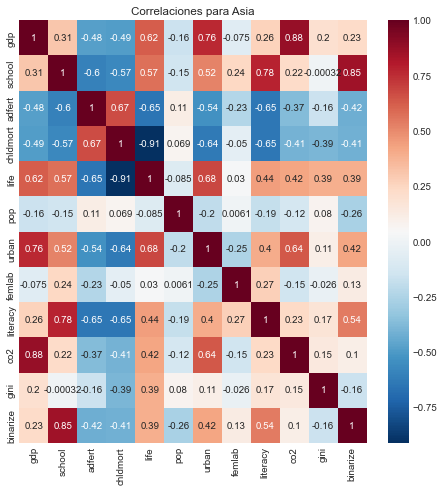

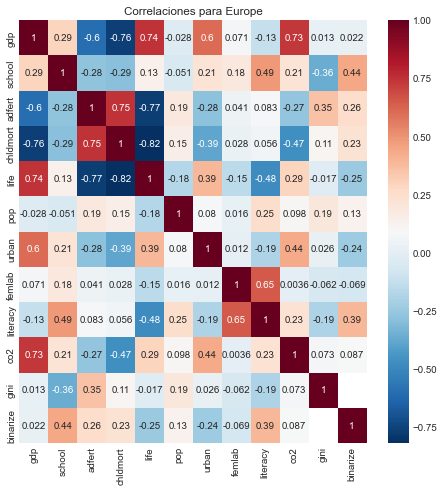

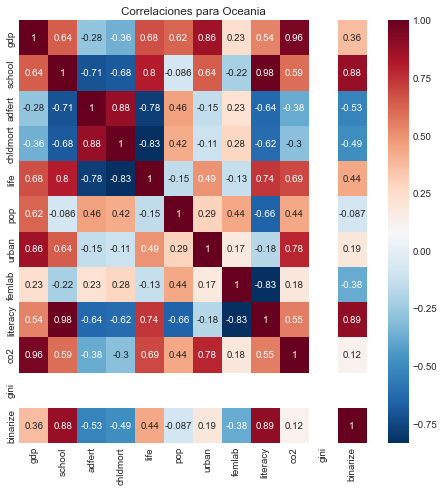

In [18]:
correlacion_heatmap(df, 'region')

In [19]:
def correlacion_clustermap(df, var):
    valores_unicos = df[var].unique()
    for v in valores_unicos:
        plt.figure(figsize=(8,8))
        sns.clustermap(np.abs(df.loc[df[var] == v].corr()), cmap='Greens', annot=True)
        plt.title(f'Correlaciones para {v}')
        plt.show()

<Figure size 560x560 with 0 Axes>

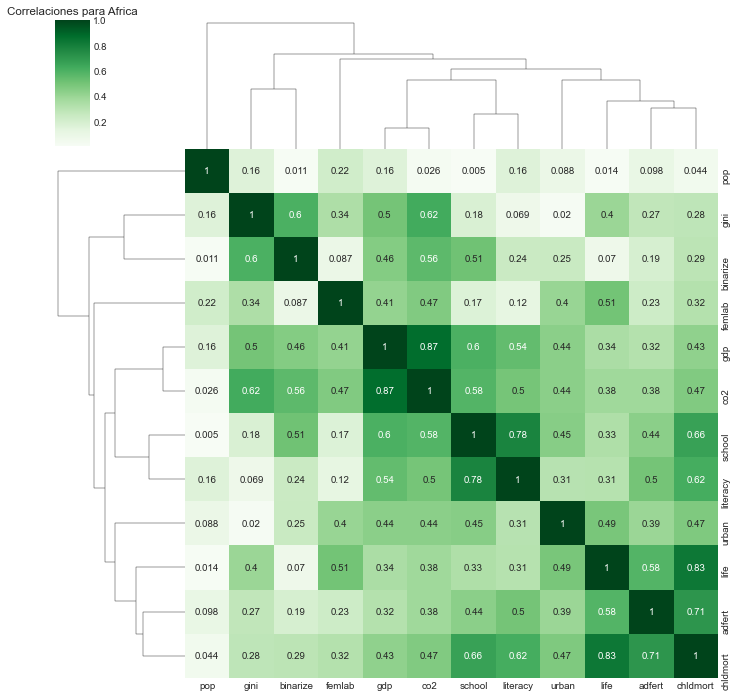

<Figure size 560x560 with 0 Axes>

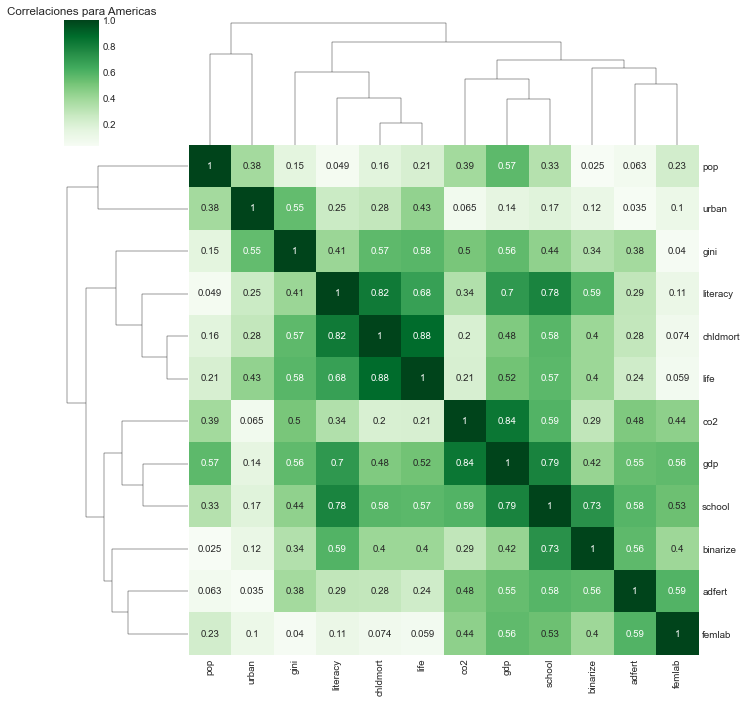

<Figure size 560x560 with 0 Axes>

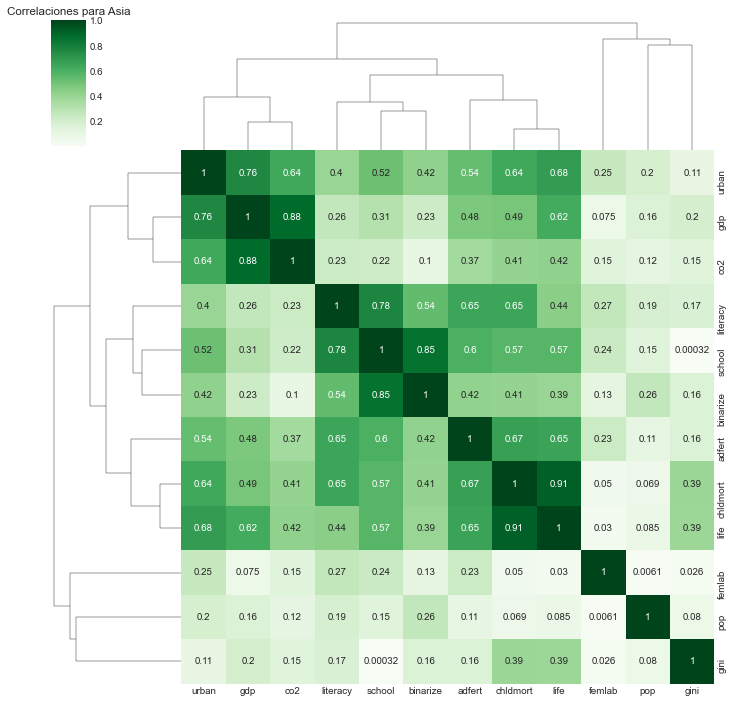

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 560x560 with 0 Axes>

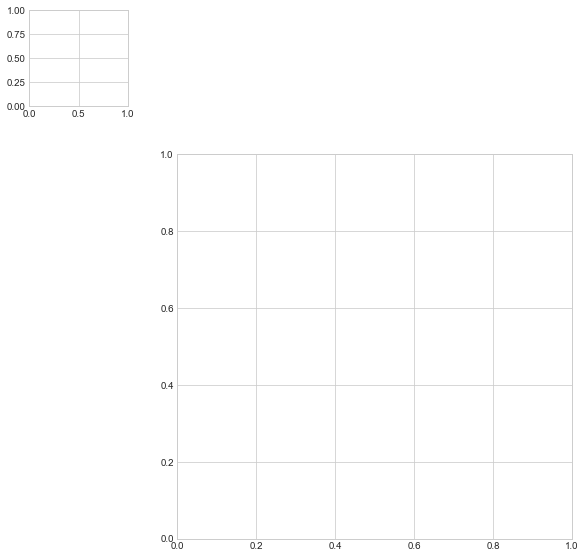

In [20]:
correlacion_clustermap(df, 'region')